# Data Analysis Project _ Titanic Challenge

In this project, I am going to do basic data analysis and gain some insights regarding data of Titanic accident in 1912. Here is a list of questions that will be answered. 

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

5.) What factors helped someone survive the sinking?

Data Source: https://www.kaggle.com/c/titanic/data (train.csv)

In [1]:
# import for data analysis and visualization
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# set up the file as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [3]:
# Preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# data info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Q1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

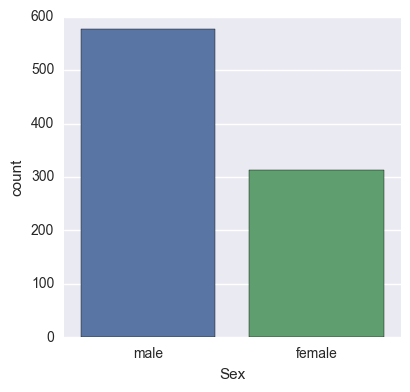

In [5]:
# first check the gender 
sns.factorplot(x='Sex', kind='count', data=titanic_df)

The graph indicates that the number of male passengers is around twice the number of female passengers.

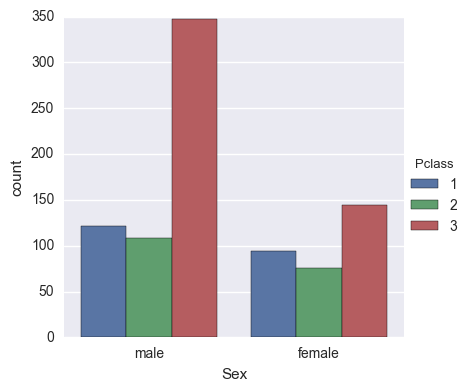

In [6]:
# separate genders by classes
sns.factorplot(x='Sex', kind='count',data=titanic_df, hue='Pclass')

From this plot, we can learn that the number of males in the 3rd class was surprisingly much higher than females in the same class. 

In [7]:
# I would like to further separate the passengers into male, female and children
# a child here is defined as under 16 

# a function to sort through sex
def male_female_child(passenger):
    # take the age and sex
    age, sex = passenger
    # compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

# define a column 'person' with categories of male, female and child 
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [8]:
# check out the first 15 rows
titanic_df[:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


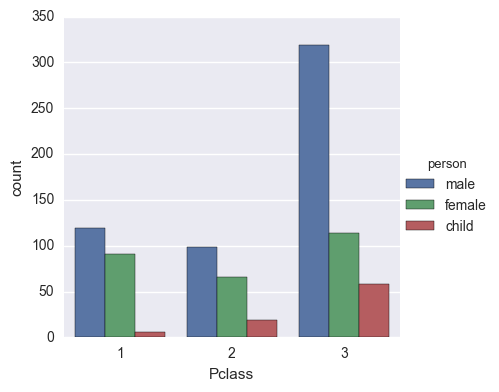

In [9]:
# do the factorplot as before again
sns.factorplot(x='Pclass', kind='count', data=titanic_df, hue='person')

It is found that more children were in 3rd class and fewer were in 1st class.

I would like to get a more precise picture of the passengers through creating a distribution of ages.

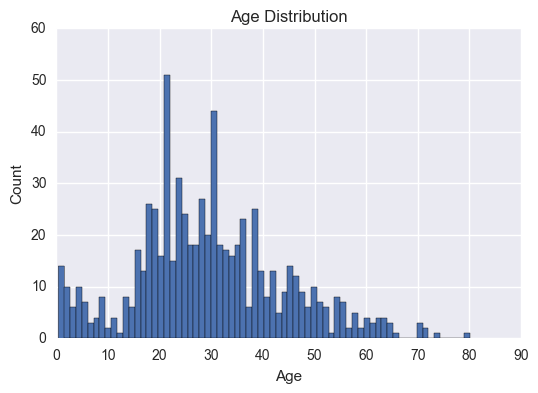

In [10]:
# create a histogram
titanic_df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

In [11]:
# comparison of male, female and child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

Next I would like to use FacetGrid to visualize the passengers with multiple kdeplots on one plot.

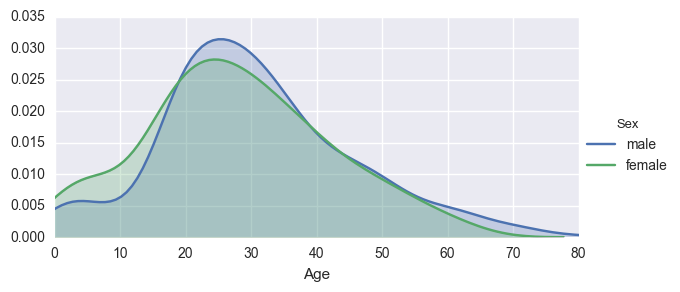

In [12]:
# set the figure equal to a facetgrid with the pandas dataframe as its 
# data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=2)
                    
# use map to plot all the kdeplots for the 'age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

# set the x axis max by the oldest passenger
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

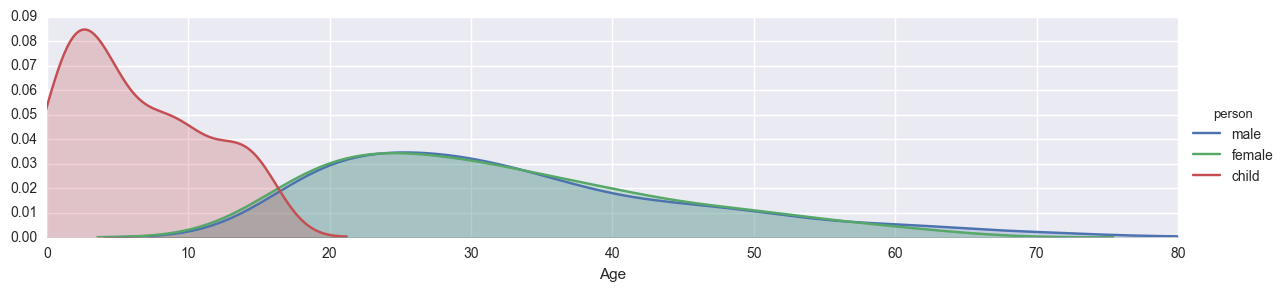

In [13]:
# do the same thing for the 'person' column to include children
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)                    
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

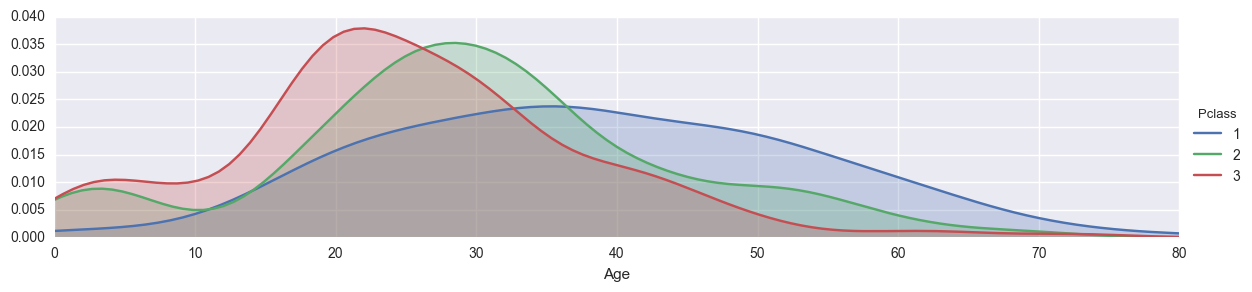

In [14]:
# repeat above by changing 'person' to 'class'
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)                    
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Q2. What deck were the passengers on and how does that relate to their class?

In [15]:
# quick view of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We can see that the 'Cabin' column has information on the deck, but it has several NaN values. These NaN values will be dropped.

In [16]:
# drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [17]:
# quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

We only need the first letter of the deck to classify the deck levels (e.g. A,B,C,D,E ...)

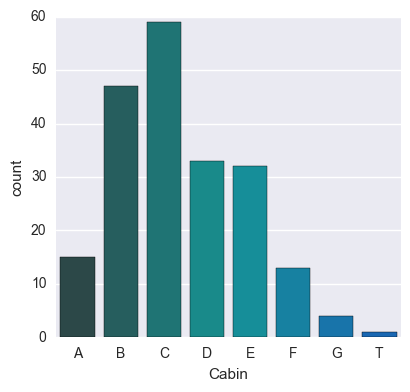

In [18]:
# grab the first letter from the 'deck' column

# set an empty list
levels = []

# loop to grab the first letter
for level in deck:
    levels.append(level[0])

# reset DataFrame and use factorplot    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot(x='Cabin', kind='count',data=cabin_df, palette='winter_d', order=['A','B','C','D','E','F','G','T'])

Note that there is a 'T' deck which does not make sense and we can drop it.

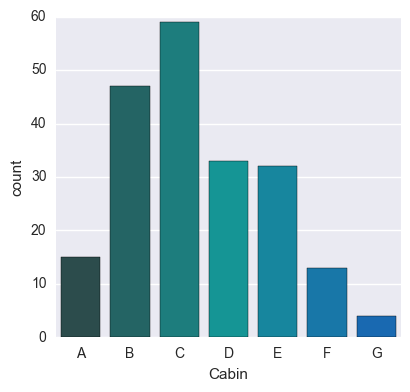

In [19]:
# redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
# replot
sns.factorplot(x='Cabin', kind='count',data=cabin_df, palette='winter_d', order=['A','B','C','D','E','F','G'])

### Q3. Where did the passengers come from?

In [20]:
# take a look at the data again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note that the 'Embarked' column has C,Q,and S values. View again the information from datasourse link we know that these stand for Cherbourg, Queenstown, Southhampton.

(C = Cherbourg; Q = Queenstown; S = Southampton)

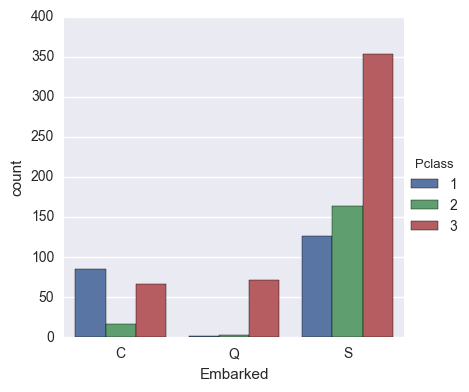

In [21]:
# factorplot of the results
sns.factorplot(x='Embarked', kind='count', data=titanic_df, hue='Pclass', order=['C','Q','S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. For further investigation, we can take a look at the economy of that town during that period of time.

### Q4. Who was alone and who was with family?

In [22]:
# add a new column to defind alone
# I add the parent/child column and the sibsp columns 
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df.Alone.head(15)

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
11    0
12    0
13    6
14    0
Name: Alone, dtype: int64

In the 'Alone' column, anything but 0 means that the passenger had familty and was not alone. 

Let's change the column so that if the value is greater than 0, we know that the passenger was with his/her family, otherwise they were alone.

In [24]:
# set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [25]:
# check to make sure it worked
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,With Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,With Family
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,With Family
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,With Family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


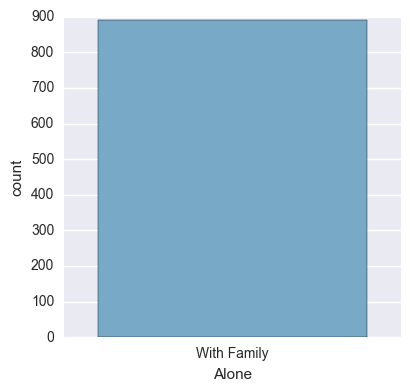

In [26]:
# factorplot regarding the status
sns.factorplot(x='Alone', kind='count', data=titanic_df, palette='Blues')

### Q5. What factors helped someone survive the sinking?

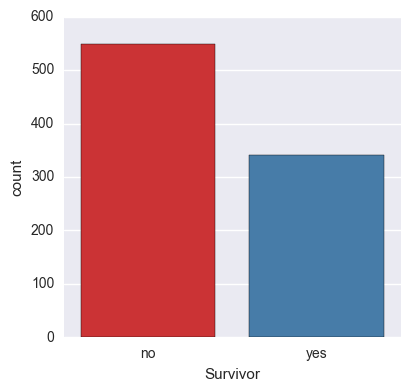

In [27]:
# creat a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

# get a quick view of the survived vs died
sns.factorplot(x='Survivor', kind='count', data=titanic_df, palette='Set1') 

From the plot, we learned that a few more people died. 

Let's see if the class of the passengers had influence on survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.


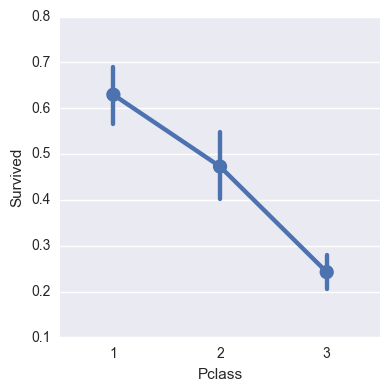

In [28]:
# factorplot considering class
sns.factorplot('Pclass','Survived', data=titanic_df)

Survival rates for the 3rd class were substantially lower and the effect might be caused by the large number of men in the 3rd class in combination with the women and children first policy.

Let's see how survival rates perform according to male, female and children.

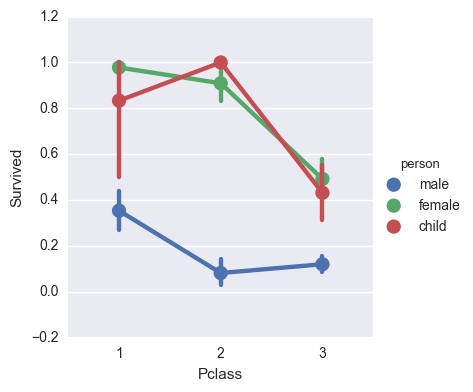

In [29]:
# factorplot considering class and gender 
sns.factorplot('Pclass','Survived', hue='person', data=titanic_df)

The plot demonstrated that being a male or being in 3rd class was not favorable for survival. Even regardless of class, the result of being a male dramatically decreased the chance of survival.

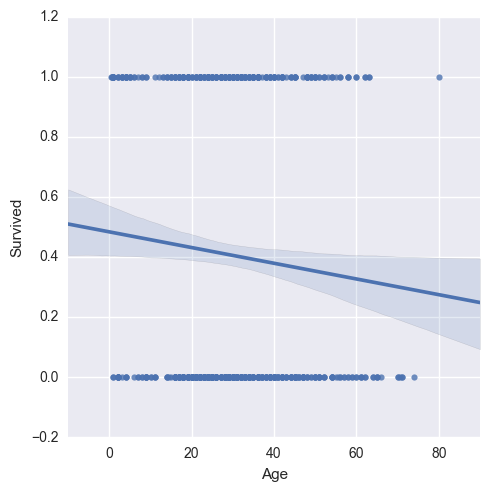

In [30]:
# a linear plot on age vs survival
sns.lmplot('Age','Survived', data=titanic_df)

It looks like that older passengers were less likely to survive.

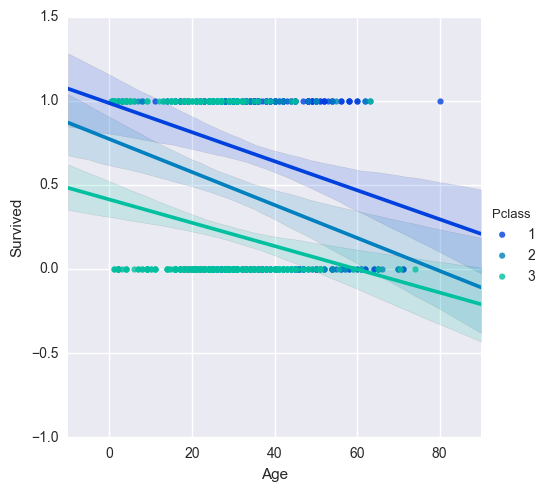

In [31]:
# linear plot on age vs survival using hue for class 
sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df, palette='winter')

This plot showed that higher class had higher survival rate.

We then use X_bin argument to clean up the figure and grab the data and bin it by age with std attached.

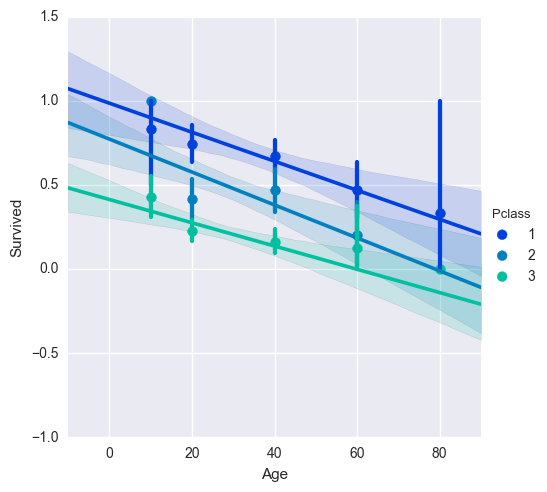

In [32]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter',x_bins=generations)

We can find that much more variation of survival rate for the 1st class older passengers.

We next see how gender and age relate to survival.

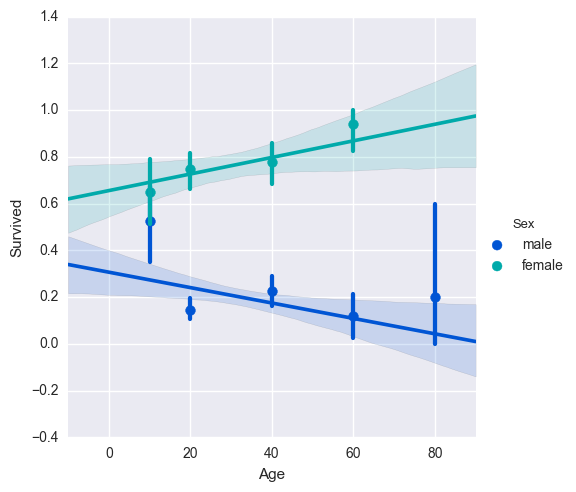

In [33]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df, palette='winter',x_bins=generations)

From the plot we learned that older males has lower survival rate than younger males, while older females has higher survival rate than younger females.